# Coursework 3

### PLAGIARISM/COLLUSION DECLARATION

 

Coursework submitted for assessment must be the original work of you and your group. Assignments are subjected to regular checks for plagiarism and/or collusion. Plagiarism is the presentation of another person’s thoughts or words (those outside your group) as if they were your own. Collusion involves obtaining help from someone outside your group to complete your work. In preparing your coursework, you should not seek help, or copy from any other person or source, including the

Internet, without proper and explicit acknowledgement.

 

There is a procedure in place for you to declare individual contributions within your group for courswork. You must declare the contributions fairly and accurately.

 

You must not disclose your solutions or insights related to coursework with anyone else, including future students or the Internet.

 

By acknowledging the the statements above, you are declaring that both this and all subsequent pieces of coursework are, and will remain, the original work of you and your group.

 

* Submissions will not be accepted without the aforementioned declaration.

 

* Members of a group are deemed to have collective responsibility for the integrity for work submitted and are liable for any penalty imposed, proportionate to their contributions.

In [50]:
using JLD2,FileIO
using LinearAlgebra, Wavelets, FFTW, LinearMaps, IterativeSolvers, LinearOperators, Plots


In [51]:
Base.@kwdef mutable struct CourseWork_3
    
    CID::Int
    Plagiarism_declare::Union{Missing,Bool}
    Demo_willing::Union{Missing,Bool}
    
    # 8.1 Proximal Operator
    
    Q8_1_a_data_z::Vector
    Q8_1_a_data_gamma::Float64
    
    Q8_1_a_ans_x::Union{Missing,Vector}
    
    Q8_1_b_data_z::Vector
    Q8_1_b_data_gamma::Float64
    
    Q8_1_b_ans_x::Union{Missing,Vector}
    
    # 8.2  MRI CS Recovery: ADMM
    
    Q8_2_data_y::Vector
    Q8_2_data_Omega::Matrix
    Q8_2_data_X2_ini::Matrix
    Q8_2_data_X3_ini::Matrix
    Q8_2_data_X4_ini::Matrix
    Q8_2_data_X5_ini::Matrix
    Q8_2_data_U2_ini::Matrix
    Q8_2_data_U3_ini::Matrix
    Q8_2_data_U4_ini::Matrix
    Q8_2_data_U5_ini::Matrix
    Q8_2_data_lambda1::Float64
    Q8_2_data_lambda2::Float64
    Q8_2_data_lambda3::Float64
    Q8_2_data_rho::Float64
    
    Q8_2_1_ans_X1::Union{Missing,Matrix}
    
    Q8_2_2_ans_X2::Union{Missing,Matrix}
    Q8_2_2_ans_X3::Union{Missing,Matrix}
    Q8_2_2_ans_X4::Union{Missing,Matrix}
    Q8_2_2_ans_X5::Union{Missing,Matrix}
    
    Q8_2_3_ans_U2::Union{Missing,Matrix}
    Q8_2_3_ans_U3::Union{Missing,Matrix}
    Q8_2_3_ans_U4::Union{Missing,Matrix}
    Q8_2_3_ans_U5::Union{Missing,Matrix}
    
    Q8_2_4_ans_Xhat::Union{Missing,Matrix}
    
    # 8.3. Blind Deconvolution: Convex Relaxation
    
    Q8_3_data_y::Vector
    Q8_3_data_X2_ini::Matrix
    Q8_3_data_X3_ini::Matrix
    Q8_3_data_X4_ini::Matrix
    Q8_3_data_U2_ini::Matrix
    Q8_3_data_U3_ini::Matrix
    Q8_3_data_U4_ini::Matrix
    Q8_3_data_lambda1::Float64
    Q8_3_data_lambda2::Float64
    Q8_3_data_lambda3::Float64
    
    Q8_3_2_ans_X1::Union{Missing,Matrix}
    
    Q8_3_3_ans_X2::Union{Missing,Matrix}
    Q8_3_3_ans_X3::Union{Missing,Matrix}
    Q8_3_3_ans_X4::Union{Missing,Matrix}
    
    Q8_3_4_ans_U2::Union{Missing,Matrix}
    Q8_3_4_ans_U3::Union{Missing,Matrix}
    Q8_3_4_ans_U4::Union{Missing,Matrix}
    
    Q8_3_5_ans_Xhat::Union{Missing,Matrix}
    
    # Blind Deconvolution
    
    Q8_4_data_y::Vector
    Q8_4_data_x1ini::Vector
    Q8_4_data_x2ini::Vector
    Q8_4_data_x3ini::Vector
    Q8_4_data_h1ini::Vector
    Q8_4_data_h2ini::Vector
    Q8_4_data_alpha::Float64
    
    Q8_4_1_a_ans_H::Union{Missing,Matrix}
    Q8_4_1_b_ans_tau::Union{Missing,Float64}
    Q8_4_1_c_ans_x1::Union{Missing,Vector}
    Q8_4_1_c_ans_x2::Union{Missing,Vector}
    Q8_4_1_c_ans_x3::Union{Missing,Vector}
    Q8_4_1_d_ans_subg::Union{Missing,Vector}
    
    Q8_4_2_a_ans_H::Union{Missing,Matrix}
    Q8_4_2_b_ans_tau::Union{Missing,Float64}
    Q8_4_2_c_ans_h1::Union{Missing,Vector}
    Q8_4_2_c_ans_h2::Union{Missing,Vector}
    Q8_4_2_d_ans_subg::Union{Missing,Vector}
    
    Q8_4_3_ans_subg::Union{Missing,Vector}
    
    Q8_4_4_ans_x1::Union{Missing,Vector}
    Q8_4_4_ans_h1::Union{Missing,Vector}
    
    
    
end

CourseWork_3

In [52]:
# Download and upload data from JLD file, refer to https://juliaio.github.io/JLD2.jl/dev/ 

# Example
A = JLD2.load("Thomas Auguste2508302StudentFile.jld2");
A = A[ "CourseWork_3" ];
A.Demo_willing = true;


In [53]:
jldopen("Thomas Auguste2508302StudentFile.jld2", "w") do file
    write(file, "CourseWork_3", A)
 end

## 8.1. Proximal Operator (Continued)


### 1. (a)

In [54]:
# useful function to compute the proximal term error
function compute_error(element, gamma)
    (1 / (2 * gamma)) * norm(element, 2)^2
end

compute_error (generic function with 1 method)

In [55]:
z = A.Q8_1_a_data_z
gamma = A.Q8_1_a_data_gamma

# Differentiable least square problem.
# Differentiating with respect to x and then set to zero gives:
x = z / (gamma + 1)

error_x = (1/2) * norm(x, 2)^2 + compute_error(x - z, gamma)
print(error_x)

### 8.1a Assign to answer: 
A.Q8_1_a_ans_x = x;

7.014355312278699

### 1. (b)

In [56]:
z = A.Q8_1_b_data_z
gamma = A.Q8_1_b_data_gamma

function prox_eucl_norm(z, gamma)
    # Use closed form solution for L2 norm 
    temp = 1-gamma/norm(z)  
    temp2 = maximum([0,temp])       # Choose maximum of 0 vs 1-gamma/norm(z)
    return temp2*z
end

x = prox_eucl_norm(z, gamma)
error_x = norm(x, 2) + compute_error(x - z, gamma)
print(error_x)
### 8.1b Assign to answer: 
A.Q8_1_b_ans_x = x;

9.679834669208836

## 8.2. MRI CS Recovery: ADMM

### 1

In [57]:
# Function for opeartor A
function A_Op(X, Omega)
    X = reshape(X, size(Omega))
    O1 = fft(X)
    O2 = fftshift(O1)
    O3 = Omega .* O2
    filter(x -> x != 0, vec(O3))
end

A_Op (generic function with 1 method)

In [58]:
# Function for Adjoint of operator A
function Adjoint(z, Omega)
    (m, n) = size(Omega)
    k = 1
    reverse_subsamp = zeros(m, n)im
    for j in 1:m
        for i in 1:m
            if Omega[i, j] == 1
                reverse_subsamp[i, j] = z[k]
                k = k + 1
            end
        end
    end
    O5 = ifftshift(reverse_subsamp)
    real(ifft(O5))
end

Adjoint (generic function with 1 method)

In [59]:
function Add_row_of_zeros(original_matrix)
    # Number of columns in the original matrix
    num_columns = size(original_matrix, 2)

    # Row of zeros to add
    row_of_zeros = zeros(1, num_columns)

    # Add a row of zeros at the bottom
    matrix_with_zeros = vcat(original_matrix, row_of_zeros)
end

Add_row_of_zeros (generic function with 1 method)

In [60]:
# Define the linear operation function LinOp
function LinOp(x)
    Omega = A.Q8_2_data_Omega
    (m, n) = size(Omega)
    iden = Matrix(1.0I, m-1, m-1)
    K1 = hcat(zeros(m-1), iden)
    K2 = hcat(iden, zeros(m-1))
    multip = 2 * A.Q8_2_data_rho * (1 + norm(vec(K2- K1), 2)^2)
    
    vec(Adjoint(A_Op(x, Omega), Omega) + reshape(multip * x, size(Omega)))
end

LinOp (generic function with 1 method)

In [61]:
function update_X1(X2, X3, X4, X5, U2, U3, U4, U5, Omega, rho)
    (m, n) = size(Omega)
    iden = Matrix(1.0I, m-1, m-1)
    K1 = hcat(zeros(m-1), iden)
    K2 = hcat(iden, zeros(m-1))

    y_term = Adjoint(y, Omega)
    U_term = U2 + U3 + (U5' * K1) - (U5' * K2) + (K1' * U4) - (K2' * U4)
    X_term = rho * (X2 + X3 + (K2 - K1)' * X4 + X5' * (K2 - K1))
    
    b = vec(y_term + U_term + X_term)
    C = LinearOperator(Float64, m * n, m * n, false, false, (z, x) -> z .= LinOp(x))

    X1 = cg(C, b)
    reshape(X1, size(Omega))
end

update_X1 (generic function with 1 method)

In [62]:
y = A.Q8_2_data_y
Omega = A.Q8_2_data_Omega
X2_0 = A.Q8_2_data_X2_ini
X3_0 = A.Q8_2_data_X3_ini
X4_0 = A.Q8_2_data_X4_ini
X5_0 = A.Q8_2_data_X5_ini
U2_0 = A.Q8_2_data_U2_ini
U3_0 = A.Q8_2_data_U3_ini
U4_0 = A.Q8_2_data_U4_ini
U5_0 = A.Q8_2_data_U5_ini
rho = A.Q8_2_data_rho

X1 = update_X1(X2_0, X3_0, X4_0, X5_0, U2_0, U3_0, U4_0, U5_0, Omega, rho)

A.Q8_2_1_ans_X1 = X1;

### 2

In [63]:
function soft_threshold(z, gamma, lambda)
    sign.(z) .* max.((abs.(z) / gamma) .- lambda, 0)
end

soft_threshold (generic function with 1 method)

In [64]:
function update_X2(X1, U2, rho, lambda1)
    Z = X1 - (1/rho) * U2
    WC = dwt(Z, wavelet(WT.db4))
    WX2 = soft_threshold(WC, 1/rho, lambda1)
    idwt(WX2,  wavelet(WT.db4))
end

update_X2 (generic function with 1 method)

In [65]:
function update_X3(X1, U3, rho, lambda2)
    Z = X1 - (1/rho) * U3
    WC = dct(Z)
    WX3 = soft_threshold(WC, 1/rho, lambda2)
    idct(WX3)
end

update_X3 (generic function with 1 method)

In [66]:
function update_X4_5(X1, U4, U5, rho, lambda3)
    (m, n) = size(U4)
    iden = Matrix(1.0I, m, m)
    K1 = hcat(zeros(m), iden)
    K2 = hcat(iden, zeros(m))
    dK = K1 - K2
    
    A = dK * X1 - (1/rho) * U4
    B = dK * X1' - (1/rho) * U5

    N = rho .* sqrt.(A.^2 + B.^2)
    C = (N .- lambda3) ./ N
    X4 = C .* A
    X5 = C .* B
    X4, X5
end

update_X4_5 (generic function with 1 method)

In [67]:
y = A.Q8_2_data_y
Omega = A.Q8_2_data_Omega
X2_0 = A.Q8_2_data_X2_ini
X3_0 = A.Q8_2_data_X3_ini
X4_0 = A.Q8_2_data_X4_ini
X5_0 = A.Q8_2_data_X5_ini
U2_0 = A.Q8_2_data_U2_ini
U3_0 = A.Q8_2_data_U3_ini
U4_0 = A.Q8_2_data_U4_ini
U5_0 = A.Q8_2_data_U5_ini
rho = A.Q8_2_data_rho
lambda1 = A.Q8_2_data_lambda1
lambda2 = A.Q8_2_data_lambda2
lambda3 = A.Q8_2_data_lambda3

X1_1 = update_X1(X2_0, X3_0, X4_0, X5_0, U2_0, U3_0, U4_0, U5_0, Omega, rho)
X2_1 = update_X2(X1_1, U2_0, rho, lambda1)
X3_1 = update_X3(X1_1, U3_0, rho, lambda2)
X4_1, X5_1 = update_X4_5(X1_1, U4_0, U5_0, rho, lambda3)

A.Q8_2_2_ans_X2 = X2_1
A.Q8_2_2_ans_X3 = X3_1
A.Q8_2_2_ans_X4 = X4_1
A.Q8_2_2_ans_X5 = X5_1;

In [68]:
function cost_X1(X1, y, Omega)
    (1/2) * norm(y - A_Op(X1, Omega), 2)^2
end;

In [69]:
function cost_X2(X2, lambda1)
    lambda1 * norm(dwt(X2, wavelet(WT.db4)), 1)
end;

In [70]:
function cost_X3(X3, lambda2)
    lambda2 * norm(dct(X3), 1)
end;

In [71]:
function cost_X4_5(X4, X5, lambda3)
    lambda3 * TV(X4, X5)
end;

### 3

In [72]:
function update_U2(U2_p, rho, X1_n, X2_n)
    U2_p + rho * (X2_n - X1_n)
end

update_U2 (generic function with 1 method)

In [73]:
function update_U3(U3_p, rho, X1_n, X3_n)
    U3_p + rho * (X3_n - X1_n)
end

update_U3 (generic function with 1 method)

In [74]:
function update_U4(U4_p, rho, X1_n, X4_n)
    (m, n) = size(X1_n)
    iden = Matrix(1.0I, m-1, m-1)
    K1 = hcat(zeros(m-1), iden)
    K2 = hcat(iden, zeros(m-1))

    U4_p + rho * (X4_n - (K1 - K2) * X1_n)
end

update_U4 (generic function with 1 method)

In [75]:
function update_U5(U5_p, rho, X1_n, X5_n)
    (m, n) = size(X1_n)
    iden = Matrix(1.0I, m-1, m-1)
    K1 = hcat(zeros(m-1), iden)
    K2 = hcat(iden, zeros(m-1))

    U5_p + rho * (X5_n - (K1 - K2) * X1_n')
end

update_U5 (generic function with 1 method)

In [76]:
y = A.Q8_2_data_y
Omega = A.Q8_2_data_Omega
X2_0 = A.Q8_2_data_X2_ini
X3_0 = A.Q8_2_data_X3_ini
X4_0 = A.Q8_2_data_X4_ini
X5_0 = A.Q8_2_data_X5_ini
U2_0 = A.Q8_2_data_U2_ini
U3_0 = A.Q8_2_data_U3_ini
U4_0 = A.Q8_2_data_U4_ini
U5_0 = A.Q8_2_data_U5_ini
rho = A.Q8_2_data_rho
lambda1 = A.Q8_2_data_lambda1
lambda2 = A.Q8_2_data_lambda2
lambda3 = A.Q8_2_data_lambda3

X1_1 = update_X1(X2_0, X3_0, X4_0, X5_0, U2_0, U3_0, U4_0, U5_0, Omega, rho)
X2_1 = update_X2(X1_1, U2_0, rho, lambda1)
X3_1 = update_X3(X1_1, U3_0, rho, lambda2)
X4_1, X5_1 = update_X4_5(X1_1, U4_0, U5_0, rho, lambda3)

A.Q8_2_3_ans_U2 = update_U2(U2_0, rho, X1_1, X2_1)
A.Q8_2_3_ans_U3 = update_U3(U3_0, rho, X1_1, X3_1)
A.Q8_2_3_ans_U4 = update_U4(U4_0, rho, X1_1, X4_1)
A.Q8_2_3_ans_U5 = update_U5(U5_0, rho, X1_1, X5_1);

### 4

In [77]:
function TV(X4, X5)
    T = sqrt.(X4[:,1:end-1].^2 + (X5[:,1:end-1]').^2)
    sum(T)
end

TV (generic function with 1 method)

In [78]:
function cost(X1, X2, X3, X4, X5, y, rho, Omega, lambda1, lambda2, lambda3)
    (1/2) * norm(y - A_Op(X1, Omega), 2)^2 + lambda1 * norm(dwt(X2, wavelet(WT.db4)), 1) + lambda2 * norm(dct(X3), 1) + lambda3 * TV(X4, X5)
end

cost (generic function with 1 method)

In [79]:
function compute_primal(X1, X2, X3, X4, X5)
    (m, n) = size(X1)
    iden = Matrix(1.0I, m-1, m-1)
    K1 = hcat(zeros(m-1), iden)
    K2 = hcat(iden, zeros(m-1))

    norm(X2 + X3 + Add_row_of_zeros(X4) + Add_row_of_zeros(X5)' - 2X1 - Add_row_of_zeros((K1 - K2) * X1) - Add_row_of_zeros((K1 - K2) * X1')', 2)
end

compute_primal (generic function with 1 method)

In [80]:
function compute_dual(X2_p, X3_p, X4_p, X2_n, X3_n, X4_n, rho)
    norm(- rho * (X2_n + X3_n + Add_row_of_zeros(X4_n) + Add_row_of_zeros(X5_n)' - X2_p - X3_p - Add_row_of_zeros(X4_p) - Add_row_of_zeros(X5_p)'), 2)
end

compute_dual (generic function with 1 method)

In [81]:
function ADMM(X2, X3, X4, X5, U2, U3, U4, U5, y, rho, Omega, lambda1, lambda2, lambda3, max_iter, stop_crit)
    X1 = zeros(size(X2))
    X2_p = zeros(size(X2))
    X3_p = zeros(size(X3))
    X4_p = zeros(size(X4))
    X5_p = zeros(size(X5))
    costs = Vector{Float64}()
    c = 0

    while (compute_primal(X1, X2, X3, X4, X5) > stop_crit || compute_dual(X2_p, X3_p, X4_p, X5_p, X2, X3, X4, X5, rho) > stop_crit) && c < max_iter
        X2_p = X2
        X3_p = X3
        X4_p = X4
        X5_p = X5

        X1 = update_X1(X2, X3, X4, X5, U2, U3, U4, U5, Omega, rho)
        X2 = update_X2(X1, U2, rho, lambda1)
        X3 = update_X3(X1, U3, rho, lambda2)
        X4, X5 = update_X4_5(X1, U4, U5, rho, lambda3)

        U2 = update_U2(U2, rho, X1, X2)
        U3 = update_U3(U3, rho, X1, X3)
        U4 = update_U4(U4, rho, X1, X4)
        U5 = update_U5(U5, rho, X1, X5)
        v = cost(X1, X2, X3, X4, X5, y, rho, Omega, lambda1, lambda2, lambda3)
        push!(costs, v)
        #print(compute_primal(X1, X2, X3, X4))
        c += 1
    end
    print(costs[end])
    print("\n")
    print(c)
    iterations = 1:length(costs)
    plot(iterations, costs, yaxis=:log)
    X1
end

ADMM (generic function with 1 method)

In [82]:
y = A.Q8_2_data_y
Omega = A.Q8_2_data_Omega
X2_0 = A.Q8_2_data_X2_ini
X3_0 = A.Q8_2_data_X3_ini
X4_0 = A.Q8_2_data_X4_ini
X5_0 = A.Q8_2_data_X5_ini
U2_0 = A.Q8_2_data_U2_ini
U3_0 = A.Q8_2_data_U3_ini
U4_0 = A.Q8_2_data_U4_ini
U5_0 = A.Q8_2_data_U5_ini
rho = A.Q8_2_data_rho
lambda1 = A.Q8_2_data_lambda1
lambda2 = A.Q8_2_data_lambda2
lambda3 = A.Q8_2_data_lambda3

X = ADMM(X2_0, X3_0, X4_0, X5_0, U2_0, U3_0, U4_0, U5_0, y, rho, Omega, lambda1, lambda2, lambda3, 3, 10e-4)

A.Q8_2_4_ans_Xhat = X

6.68265188268447e10
3

512×512 Matrix{Float64}:
 -0.0125666   -0.0141089    -0.00283809   …  -0.0133554    0.00694141
 -0.00669344  -0.00504469   -0.00466804       0.00449047   0.0156893
  0.0191302    0.00987025   -0.0278489        0.0273599    0.0382431
  0.00179418  -0.00423996   -0.0159022       -0.00816209   0.00681766
 -0.00993908   0.0301131     0.0128173       -0.00469624  -0.000755397
 -0.0122856    0.0165299     0.0204932    …  -0.0203242    0.00890667
  0.0119812   -0.0117799     0.029701         0.00815993   0.0253228
  0.0157031    0.0180262    -0.00347465      -0.00050398   0.0331395
 -0.00174559  -0.0185452     0.0113937        0.0315959   -0.0354976
  0.042317    -0.0142161    -0.00146761       0.00287496  -0.0222129
  ⋮                                       ⋱   ⋮           
  0.0244181   -0.0120384    -0.01769         -0.0302055    0.0128867
 -0.012208    -0.00935158    0.0200701        0.0158457    0.011449
 -0.00679647  -0.010463     -0.0342279    …   0.0120041   -0.00113864
  0.00980436  

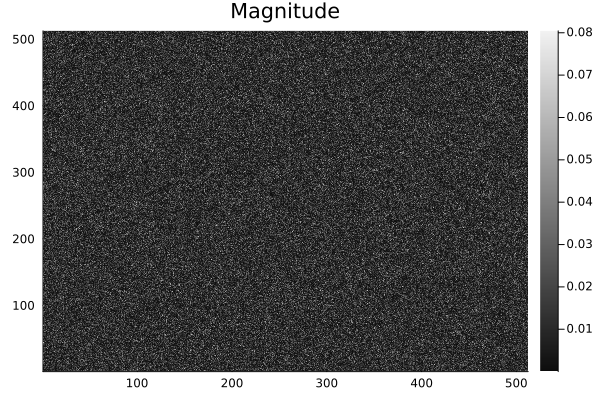

In [83]:
### Plot the thing and have a look
magnitude = abs.(A.Q8_2_4_ans_Xhat)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)

## 8.3. Blind Deconvolution: Convex Relaxation

### 1

$L_{\rho} = \frac{1}{2} \|y - A(X_1)\|_2^2 + \lambda_1 \|X_2\|_{\star} + \lambda_2 TV_{col}(X_1, X_3) + \lambda_3 \|X_4\|_{2,1} + \langle U_2, X_2 - X_1 \rangle + \frac{\rho}{2} \|X_2 - X_1\|_F^2 + \langle U_3, X_3 - (X_1)_{2:m,:} + (X_1)_{1:m-1,:} \rangle + \frac{\rho}{2} \|X_3 - (X_1)_{2:m,:} + (X_1)_{1:m-1,:}\|_F^2 + \langle U_4, X_4 - X_1 \rangle + \frac{\rho}{2} \|X_4 - X_1\|_F^2$

### 2

In [84]:
function buildA(m, n)
    ref_m = Matrix(1.0I, m, m)
    A = Matrix(1.0I, m, m)
    for i in 1:n-1
        ref_m = vcat(zeros(1, m), ref_m[1:m-1,:])
        A = hcat(A, ref_m)
    end
    A
end


buildA (generic function with 1 method)

In [85]:
function update_X1(X2, X3, X4, U2, U3, U4, y, rho)
    (m, n) = size(X2)
    A = buildA(m, n)

    iden = Matrix(1.0I, m-1, m-1)
    iden_n = Matrix(1.0I, n, n)
    k1 = hcat(zeros(m-1), iden)
    k2 = hcat(iden, zeros(m-1))
    K1 = kron(iden_n, k1)
    K2 = kron(iden_n, k2)
    dK = K2 - K1
    nK = norm(vec(dK), 2)

    D = A' * A + (rho * (2 + nK^2)) * I
    c = - A' * y - vec(U2) - rho * (vec(X2) + vec(X4)) + dK' * vec(U3) - vec(U4) + rho * dK' * vec(X3)

    X1 = - D \ c
    reshape(X1, m, n)
end

update_X1 (generic function with 2 methods)

In [86]:
y = A.Q8_3_data_y
X2_0 = A.Q8_3_data_X2_ini
X3_0 = A.Q8_3_data_X3_ini
X4_0 = A.Q8_3_data_X4_ini
U2_0 = A.Q8_3_data_U2_ini
U3_0 = A.Q8_3_data_U3_ini
U4_0 = A.Q8_3_data_U4_ini

rho = 1000

X1 = update_X1(X2_0, X3_0, X4_0, U2_0, U3_0, U4_0, y, rho)

A.Q8_3_2_ans_X1 = X1;

### 3

In [87]:
function soft_threshold(x, gamma) 
    sign(x) * max(abs(x) - gamma, 0)
end

soft_threshold (generic function with 2 methods)

In [88]:
function update_X2(X1, U2, rho, lambda1)
    Z = X1 - (1/rho) * U2
    decomp = svd(Z)
    SV = Vector{Float64}()
    
    for sv in decomp.S
        push!(SV, soft_threshold(sv, lambda1/rho))
    end

    S = Diagonal(SV)
    decomp.U * S * decomp.Vt
end

update_X2 (generic function with 1 method)

In [89]:
function update_X3(X1, U3, rho, lambda2)
    (m, n) = size(U3)
    
    iden = Matrix(1.0I, m, m)
    K1 = hcat(zeros(m), iden)
    K2 = hcat(iden, zeros(m))
    dK = K2 - K1

    X3T = zeros(n)
    Z = X1' * (K1 - K2)' - (1/rho) * U3'
    for i in 1:m
        z = Z[:,i]
        x = ((norm(z, 2) - (lambda3/rho)) / norm(z, 2)) * z
        X3T = hcat(X3T, x)
    end

    X3T[:,2:end]'
end

update_X3 (generic function with 1 method)

In [90]:
function update_X4(X1, U4, rho, lambda3)
    (m, n) = size(U4)
    X4 = zeros(m)
    Z = X1 - (1/rho) * U4

    for i in 1:n
        z = Z[:,i]
        x = ((norm(z, 2) - (lambda3/rho)) / norm(z, 2)) * z
        X4 = hcat(X4, x)
    end

    X4[:,2:end]
end

update_X4 (generic function with 1 method)

In [91]:
U2_0 = A.Q8_3_data_U2_ini
U3_0 = A.Q8_3_data_U3_ini
U4_0 = A.Q8_3_data_U4_ini
lambda1 = A.Q8_3_data_lambda1
lambda2 = A.Q8_3_data_lambda2
lambda3 = A.Q8_3_data_lambda3

X1_1 = A.Q8_3_2_ans_X1

rho = 1000

A.Q8_3_3_ans_X2 = update_X2(X1_1, U2_0, rho, lambda1)
A.Q8_3_3_ans_X3 = update_X3(X1_1, U3_0, rho, lambda2)
A.Q8_3_3_ans_X4 = update_X4(X1_1, U4_0, rho, lambda3);

### 4

In [92]:
function update_U2(U2_p, rho, X1_n, X2_n)
    U2_p + rho * (X2_n - X1_n)
end

update_U2 (generic function with 1 method)

In [93]:
function update_U3(U3_p, rho, X1_n, X3_n)
    (m, n) = size(X1_n)
    iden = Matrix(1.0I, m-1, m-1)
    K1 = hcat(zeros(m-1), iden)
    K2 = hcat(iden, zeros(m-1))

    U3_p + rho * (X3_n - K1 * X1_n + K2 * X1_n)

end

update_U3 (generic function with 1 method)

In [94]:
function update_U4(U4_p, rho, X1_n, X4_n)
    U4_p + rho * (X4_n - X1_n)
end

update_U4 (generic function with 1 method)

In [95]:
y = A.Q8_3_data_y
X2_0 = A.Q8_3_data_X2_ini
X3_0 = A.Q8_3_data_X3_ini
X4_0 = A.Q8_3_data_X4_ini
U2_0 = A.Q8_3_data_U2_ini
U3_0 = A.Q8_3_data_U3_ini
U4_0 = A.Q8_3_data_U4_ini

rho = 1000

X1_1 = update_X1(X2_0, X3_0, X4_0, U2_0, U3_0, U4_0, y, rho)
X2_1 = update_X2(X1_1, U2_0, rho, lambda1)
X3_1 = update_X3(X1_1, U3_0, rho, lambda2)
X4_1 = update_X4(X1_1, U4_0, rho, lambda3)

A.Q8_3_4_ans_U2 = update_U2(U2_0, rho, X1_1, X2_1)
A.Q8_3_4_ans_U3 = update_U3(U3_0, rho, X1_1, X3_1)
A.Q8_3_4_ans_U4 = update_U4(U4_0, rho, X1_1, X4_1);

### 5

In [96]:
function l21norm(X)
    sum(norm(X[:, j]) for j in 1:size(X, 2))
end

l21norm (generic function with 1 method)

In [97]:
function nuclear_norm(X)
    sum(svd(X).S)
end

nuclear_norm (generic function with 1 method)

In [98]:
function cost(X1, X2, X3, X4, U2, U3, U4, y, rho, lambda1, lambda2, lambda3)
    (m, n) = size(X1)
    A = buildA(m, n)
    (1/2) * norm(y - A * vec(X1), 2)^2 + lambda1 * nuclear_norm(X2) + lambda2 * l21norm(X3') + lambda3 * l21norm(X4)
end

cost (generic function with 2 methods)

In [99]:
function ADMM(X2, X3, X4, U2, U3, U4, y, rho, lambda1, lambda2, lambda3, max_iter)
    X1 = []
    for i in 1:max_iter
        X1 = update_X1(X2, X3, X4, U2, U3, U4, y, rho)
        X2 = update_X2(X1, U2_0, rho, lambda1)
        X3 = update_X3(X1, U3_0, rho, lambda2)
        X4 = update_X4(X1, U4_0, rho, lambda3)

        U2 = update_U2(U2, rho, X1, X2)
        U3 = update_U3(U3, rho, X1, X3)
        U4 = update_U4(U4, rho, X1, X4)
        print(cost(X1, X2, X3, X4, U2, U3, U4, y, rho, lambda1, lambda2, lambda3))
    end
    X1
end

ADMM (generic function with 2 methods)

In [100]:
y = A.Q8_3_data_y
X2_0 = A.Q8_3_data_X2_ini
X3_0 = A.Q8_3_data_X3_ini
X4_0 = A.Q8_3_data_X4_ini
U2_0 = A.Q8_3_data_U2_ini
U3_0 = A.Q8_3_data_U3_ini
U4_0 = A.Q8_3_data_U4_ini
lambda1 = A.Q8_3_data_lambda1
lambda2 = A.Q8_3_data_lambda2
lambda3 = A.Q8_3_data_lambda3

rho = 1000

X = ADMM(X2_0, X3_0, X4_0, U2_0, U3_0, U4_0, y, rho, lambda1, lambda2, lambda3, 100)

A.Q8_3_5_ans_Xhat = X;


1.988287886384447

1.9650305383955526

1.9650741995143814

1.9651188116596598

1.9651634526226818

1.9652081210297594

1.9652528168414867

1.965297540020744

1.9653422905304592

1.9653870683336099

1.9654318733932175

1.9654767056723532

1.9655215651341331

1.965566451741718

1.96561136545832

1.9656563062471946

1.9657012740716433

1.965746268895016

1.9657912906807098

1.9658363393921663

1.9658814149928752

1.9659265174463714

1.9659716467162374

1.9660168027661025

1.9660619855596406

1.9661071950605749

1.966152431232673

1.9661976940397494

1.9662429834456656

1.9662882994143287

1.9663336419096928

1.9663790108957584

1.9664244063365728

1.9664698281962278

1.9665152764388638

1.966560751028667

1.9666062519298688

1.9666517791067473

1.9666973325236283

1.9667429121448818

1.9667885179349254

1.9668341498582227

1.966879807879283

1.9669254919626635

1.9669712020729637

1.967016938174834

1.9670627002329675

1.9671084882121053

1.9671543020770332

1.9672001417925842

1.967246007323637

1.9672918986351167

1.9673378156919927

1.9673837584592828

1.967429726902049

1.9674757209854001

1.9675217406744905

1.9675677859345202

1.96761385673073661.9676599530284307

1.9677060747929411

1.967752221989651

1.96779839458399

1.9678445925414338

1.9678908158275037

1.9679370644077658

1.967983338247833

1.9680296373133634

1.9680759615700603

1.968122310983674

1.968168685519998

1.9682150851448748

1.9682615098241893

1.9683079595238733

1.9683544342099033

1.9684009338483033

1.9684474584051403

1.9684940078465276

1.968540582138626

1.9685871812476372

1.9686338051398122

1.9686804537814446

1.9687271271388762

1.9687738251784916

1.9688205478667211

1.9688672951700414

1.9689140670549725

1.9689608634880815

1.9690076844359783

1.969054529865321

1.9691013997428104

1.9691482940351923

1.969195212709259

1.9692421557318467

1.9692891230698371.9693361146901562

1.969383130559775

1.9694301706457098

1.9694772349150225

1.9695243233348176

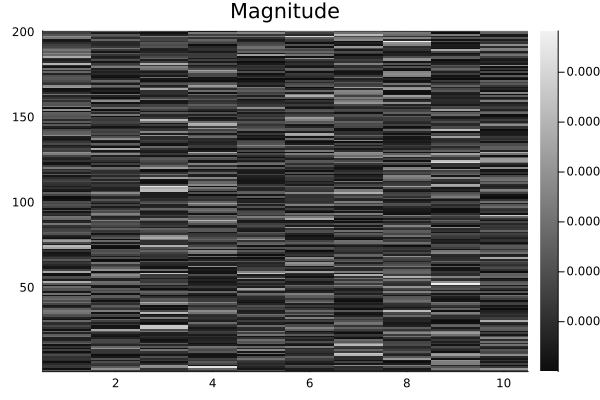

In [101]:
### Plot the thing and have a look
magnitude = abs.(A.Q8_3_5_ans_Xhat)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)

## 8.4. Blind Deconvolution

### 1

In [102]:
y_data = A.Q8_4_data_y    
x1ini_data =  A.Q8_4_data_x1ini
x2ini_data =  A.Q8_4_data_x2ini
x3ini_data =  A.Q8_4_data_x3ini
h1ini_data =  A.Q8_4_data_h1ini
h2ini_data =  A.Q8_4_data_h2ini
alpha_data =  A.Q8_4_data_alpha 
lambda_data = 0.1

### Adjust dimension for y
y_new = zeros(209)
y_new[1:200] = y_data;

Create Necessary Operators

In [103]:
### Create matrix operator D for TV operation
m = size(x1ini_data)[1]
I_200 = Matrix{Float64}(I, m, m)    # Create identity square matrix of size m*m, size of x1
I_trunk_top = I_200[2:m,:]          # Truncate top row of I
I_trunk_bottom = I_200[1:m-1,:]     # Truncate bottom row of I
D = I_trunk_top - I_trunk_bottom;   # TV matrix operator 'D' = top truncated iden matrix - bottom truncated iden matrix

# Also, use 4.3.3a to obtain convolution matrix operators
function Convolution(x,h)
    n=length(x)
    m=length(h)
    C_h=zeros(n+m-1,n)
    for i in 1:(n+m-1)
        for j in 1:n
            if i-j>=0 && i-j<m
                C_h[i,j]=h[i-j+1]
            end
        end
    end
    C_star=transpose(C_h)
    return C_h,C_star
end


Convolution (generic function with 1 method)

Closed Form Solutions for Proximal Opeartors:

In [104]:
### Closed form solution from 6.1d
function closed_form_0norm(z,gamma)
    # find the absolute values of z
    z_abs = abs.(z)
    min_error = 1.0e9
    final_x = zeros(length(z))

    # iterate through till the length of z
    for k_i in 1:length(z)
        x = zeros(length(z))

        # find the indices of k_i largest absolute values of z
        top_ki_indices = sortperm(z_abs, rev=true)[1:min(k_i, length(z_abs))]

        # copy the largest values of z to x
        x[top_ki_indices] = z[top_ki_indices]
        error = norm(x, 0) + (1/(2*gamma) * (norm((x-z),2)^2))
        
        # println("Error: ", error)
        if (error < min_error)
            min_error = error
            final_x = x
        end
    end
    return final_x
end

### Closed form solution from 6.1h
function closed_form_normis1(z,gamma)
    x = z / norm(z, 2)
    return x
end;


8.4.1a: Compute and assemble Hessian Matrix

In [105]:
# create I_199 for computing H_33
I_199 = Matrix{Float64}(I, m-1, m-1);

# Compute Each Block in Hessian Matrix using differenciation
H_11 = alpha_data*I_200 + alpha_data*(D'*D)  # differenciate w.r.t. x1 twice 
H_12 = -alpha_data*I_200                     # differenciate w.r.t. x1 then x2
H_13 = -alpha_data*D'                        # differenciate w.r.t. x1 then x3
H_22 = alpha_data*I_200                      # differenciate w.r.t. x2 twice
H_23 = zeros(m,m-1)                          # differenciate w.r.t. x2 then x3
H_33 = alpha_data*I_199;                     # differenciate w.r.t. x3 twice
# NOTE: H21, H31 and H32 are not calculated as the Hessian matrix is symmetric, thus we can just use H12, H13 and H23

# Stack each block back to 1 Hessian matrix
H_r1 = hcat(H_11, H_12, H_13)
H_r2 = hcat(H_12', H_22, H_23)
H_r3 = hcat(H_13',H_23', H_33 )
Hess = vcat(H_r1, H_r2, H_r3)

### 8.4.1a Assign to Answer
A.Q8_4_1_a_ans_H = Hess;

8.4.1b: Get Upper Bounds  
NOTE: Use the smallest upperbound

In [106]:
# c. The Liptich constant is just the largest eigen value of each hessian matrix for double differenciation of x1, x2 and x3
# As svd() automitally sort the eigen values, we simply choose the first eigen value using svd() function
_, e1, _ = svd(Hess[1:200,1:200])
l1 = e1[1]
_, e2, _ = svd(Hess[201:400,201:400])
l2 = e2[1]
_, e3, _ = svd(Hess[401:599,401:599])
l3 = e3[1]

# Upper bound = 1/Liptich constant
u1 = 1/l1
u2 = 1/l2
u3 = 1/l3

### 8.4.1b Assign to Answer
A.Q8_4_1_b_ans_tau = minimum([u1, u2, u3]); # Return smallest upper bound

8.4.1c: update x1:3 with one step proximal gradient descent

In [107]:
### Make function to run proximal gradient of 1 step for x1, x2 and x3
function prox_grad_x1(x1,x2,x3,h1,gamma)
    # First, get the matrix operator 'H' for convolution:
    H, _ = Convolution(x1, h1)

    # Obtain gradient of "Smooth" part of proximal operator for x1
    # differenciate: 1/2 * norm(y - x1 conv h1) + alpha/2 * norm(x2-x1) + alpha/2 * norm(x3-D*x1), w.r.t. x1 to get grad
    grad = alpha_data*(x1-x2+D'*(D*x1-x3))  # NOTE: D is TV operator
    z = x1 - gamma * grad 

    # We solve for x1 from the following least square problem, which is the proximal operator for x1:
    # min 1/2* x1'(H'H+(1/gamma)I)x1 + (-H'y-z)'x1
    # use cg to solve least square problem:
    op = LinearOperator(H'*H+(1/gamma)*I_200)  # LinearOpeartor for better accuracy compared to LinearMap
    b = (H'*y_new+z)'
    output = cg(op, b, maxiter=1000)
    return output, grad
end

function prox_grad_x2(x1,x2,x3,gamma)

    # Obtain gradient of "Smooth" part of proximal operator for x2
    # differenciate: alpha/2 * norm(x2-x1) w.r.t. x2 to get grad
    grad = alpha_data*(x2-x1)
    z = x2 - gamma*grad

    # Solve the following proximal operator
    # min delta(norm(x2) = 1) + 1/2gamma *norm(x2-z)
    #####
    # Using solution from 6.1h:
    output = closed_form_normis1(z,gamma)
    return output, grad

end

function prox_grad_x3(x1,x2,x3,gamma)
    # Obtain gradient of "Smooth" part of proximal operator for x3ini_data
    grad = alpha_data*(x3 - D*x1)
    z = x3 - gamma*lambda_data*grad

    # We then have proximal operator:
    # min lambda*norm(x3,0) + 1/2gamma *norm(x3-z)
    #####
    output = closed_form_0norm(z,gamma*lambda_data)
    return output, grad
end;

In [108]:
### Apply Proximal gradient
# obtain initial values
gamma_x = 0.8*minimum([u1, u2, u3])   # choose step size as 0.8*upper bound
x1 = x1ini_data
x2 = x2ini_data
x3 = x3ini_data
h1 = h1ini_data
h2 = h2ini_data

x1,grad_x1_1 = prox_grad_x1(x1,x2,x3,h1,gamma_x) # update x1
x2,grad_x2_1 = prox_grad_x2(x1,x2,x3,gamma_x) # update x2
x3,grad_x3_1 = prox_grad_x3(x1,x2,x3,gamma_x) # update x3

### 8.4.1c Assign to answer:
A.Q8_4_1_c_ans_x1 = x1;
A.Q8_4_1_c_ans_x2 = x2;
A.Q8_4_1_c_ans_x3 = x3;

8.4.1d

In [109]:
# Note that:
# Using lecture notes, subgradient of F could be given by:
# del(f_l) - del(f_l-1) - 1/gamma (x_l - x_l-1)

function subg_x(x1, x2, x3, h1)
    subg_x1 = alpha_data*(x1-x2+D'*(D*x1-x3))
    subg_x2 = alpha_data*(x2-x1)
    subg_x3 = alpha_data*(x3 - D*x1)
    subg = vcat(subg_x1, subg_x2,subg_x3)
    return subg
end

_,grad_x1_2 = prox_grad_x1(x1,x2,x3,h1,gamma_x) # Not updating x1
_,grad_x2_2 = prox_grad_x2(x1,x2,x3,gamma_x) # Not updating x2
_,grad_x3_2 = prox_grad_x3(x1,x2,x3,gamma_x) # Not updating x3

subg_x1 = grad_x1_2 - grad_x1_1  - (1/gamma_x) * (x1 - x1ini_data)
subg_x2 = grad_x2_2 - grad_x2_1  - (1/gamma_x) * (x2 - x2ini_data)
subg_x3 = grad_x3_2 - grad_x3_1  - (1/gamma_x) * (x3 - x3ini_data)

### 8.4.1d Assign to answer:
A.Q8_4_1_d_ans_subg = vcat(subg_x1,subg_x2,subg_x3);

### 2

8.4.2a: hessian matrix of h1 and h2

In [110]:
# Similarly, Compute each block in Hessian Matrix using differenciation
n = length(h1ini_data)
I_10 = Matrix{Float64}(I, n, n) # Create 10x10 identity matrix
H_11 = alpha_data * I_10            # differenciate w.r.t. x1 twice 
H_12 = -alpha_data * I_10           # differenciate w.r.t. x1 then x2
H_21 = -alpha_data * I_10
H_22 = alpha_data * I_10

# Stack them to 1 Hessian matrix
H_r1 = hcat(H_11,H_12)
H_r2 = hcat(H_21,H_22)
Hess = vcat(H_r1, H_r2)

### 8.4.2a Assign to Answer
A.Q8_4_2_a_ans_H = Hess;

8.4.2b: Find Upperbound for proximal gradient for h1:2

In [111]:
# Similarly, find Liptich constant for hessian matrix:
# Actually its just alpha
# but still, choose largest eigen value for good practice
_, e1, _ = svd(H_11)
l1 = e1[1]
_, e2, _ = svd(H_12)
l2 = e2[1]

# Upper bound = 1/Lpitich constant
upb = 1/maximum([l1,l2])

### 8.4.2b Assign to answer:
A.Q8_4_2_b_ans_tau = upb;

8.4.2c: Update h1:2 using one step of proximal operator

In [126]:
### Make function to run proximal gradient of 1 step for h1, h2
function prox_grad_h1(x1,h1,h2,gamma)
    # Get convolution operator for h1:
    H,_ = Convolution(h1,x1)

    # Obtain gradient for "smooth" part
    grad = alpha_data*(h1-h2)
    z = h1 - gamma*grad

    # Solve proximal operator, which is the following least square problem:
    # min 1/2* h1'(H'H+(1/gamma)I)h1 + (-H'y-z)'x1
    op = LinearOperator(H'*H+(1/gamma)*I_10)
    b = H'*y_new + (1/gamma)*z
    output = cg(op, b, maxiter=1000)
    return output, grad
end

function prox_grad_h2(h1, h2, gamma)
    # Obtain gradient of "smooth" part through differenciation
    grad = alpha_data*(h2-h1)
    z = h2 - gamma*lambda_data*grad
    
    # Solve proximal operator with closed form solution
    #####
    # Using solution from 6.1d:
    output = closed_form_0norm(z,gamma*lambda_data)
    return output, grad
end

prox_grad_h2 (generic function with 1 method)

In [127]:
# Choose step size as 0.8 upperbound:
gamma_h = 0.8*upb

# Run 1 step proximal operator to update h1 and h2
h1, grad_h1_1 = prox_grad_h1(x1,h1,h2,gamma_h)
h2, grad_h2_1 = prox_grad_h2(h1, h2, gamma_h)

### 8.4.2c Assign answer:
A.Q8_4_2_c_ans_h1 = h1
A.Q8_4_2_c_ans_h2 = h2;

8.4.2d: Subgradient with respect to h1:2

In [114]:
# subg for h1 is obained through differenciation, since h1 is convex
# We can differenciate the followign term with respect to h1 and get the subgradient:
# (1/2)*h1'*(H'H+alpha*I) + alpha/2 * norm(h2-h1,2)
# Differenciating gives:
function subg_h(h1, h2, x1)
    # Get convolution operator
    H,_ = Convolution(h1,x1)
    subg_h1 = (H'*H*h1 - 2*H'*y_new) + alpha_data*(h1-h2)
    subg_h2 = alpha_data * (h2-h1)
    subg = vcat(subg_h1, subg_h2)
    return subg
end

_,grad_h1_2 = prox_grad_h1(x1,h1,h2,gamma_h) # Not updating h1
_,grad_h2_2 = prox_grad_h2(h1, h2, gamma_h) # Not updating h2

subg_h1 = grad_h1_2 - grad_h1_1  - (1/gamma_h) * (h1 - h1ini_data)
subg_h2 = grad_h2_2 - grad_h2_1  - (1/gamma_h) * (h2 - h2ini_data)


### 8.4.2d Assign to answer:
A.Q8_4_2_d_ans_subg = vcat(subg_h1, subg_h2)

MethodError: MethodError: objects of type Float64 are not callable
Maybe you forgot to use an operator such as *, ^, %, / etc. ?

### 3

3. Evaluate subgradient w.r.t. x1:3 again, using updated x1:3 and h1:2

In [115]:
_,grad_x1_2 = prox_grad_x1(x1,x2,x3,h1,gamma_x) # Not updating x1
_,grad_x2_2 = prox_grad_x2(x1,x2,x3,gamma_x) # Not updating x2
_,grad_x3_2 = prox_grad_x3(x1,x2,x3,gamma_x) # Not updating x3

subg_x1 = grad_x1_2 - grad_x1_1  - (1/gamma_x) * (x1 - x1ini_data)
subg_x2 = grad_x2_2 - grad_x2_1  - (1/gamma_x) * (x2 - x2ini_data)
subg_x3 = grad_x3_2 - grad_x3_1  - (1/gamma_x) * (x3 - x3ini_data)


### 8.4.3 Assign to answer:
# A.Q8_4_3_ans_subg = subg_x(x1, x2, x3, h1);
A.Q8_4_3_ans_subg = vcat(subg_x1, subg_x2, subg_x3);


### 4

Complete Alternating minization, using at most 500 iteration, feel free to tunne hyperparameters

Here, we implement proximal gradient descent as per question requirement

In [116]:
### Variables to be optimized:
x1 = x1ini_data
x2 = x2ini_data
x3 = x3ini_data
h1 = h1ini_data
h2 = h2ini_data

### Tunnable hyperparameter:
# alpha_data = 100.0 #15
# lambda_data += 50  #0.1
# gamma_x
# gamma_h

#####################
# We now run alternating minization for 500 iterations at most, as per question requirement:
iter = 500
epsilon = 1e-5

### Records for algorithm:
loss = zeros(iter)
g_x1 = zeros(length(x1),iter)
g_x2 = zeros(length(x2),iter)
g_x3 = zeros(length(x3),iter)
g_h1 = zeros(length(h1),iter)
g_h2 = zeros(length(h2),iter)
subg_x_rec = zeros(iter)
subg_h_rec = zeros(iter)
crit_x_rec = zeros(iter)
crit_h_rec = zeros(iter)

# NOTE: Stopping criteria of at most 500 iteration is incooperated in max number of loop variable
for i in 1:iter
    ########### Alternate Updating ############
    ### Find new x1:3 with fixed h1:2
    x1_new, g_x1[:,i] = prox_grad_x1(x1,x2,x3,h1,gamma_x)   
    x2_new, g_x2[:,i] = prox_grad_x2(x1_new,x2,x3,gamma_x) 
    x3_new, g_x3[:,i] = prox_grad_x3(x1_new,x2,x3,gamma_x)
    # calculate norm of subgradient and make record
    if i > 1
        subg_x1 = g_x1[:,i] - g_x1[:,i-1] - (1/gamma_x) * (x1_new - x1)
        subg_x2 = g_x2[:,i] - g_x2[:,i-1] - (1/gamma_x) * (x2_new - x2)
        subg_x3 = g_x3[:,i] - g_x3[:,i-1] - (1/gamma_x) * (x3_new - x3)
        subg_x_rec[i] = norm(vcat(subg_x1,subg_x2,subg_x3))
    end
    # Update x1:3 
    x1 = x1_new
    x2 = x2_new
    x3 = x3_new
    
    ### Find new h1:2 with fixed x1:3
    h1_new, g_h1[:,i] = prox_grad_h1(x1,h1,h2,gamma_h)
    h2_new, g_h2[:,i] = prox_grad_h2(h1,h2,gamma_h)

    # calculate norm of subgradient and make record
    if i>1
        subg_h1 = g_h1[:,i] - g_h1[:,i-1] - (1/gamma_h) * (h1_new - h1)
        subg_h2 = g_h2[:,i] - g_h2[:,i-1] - (1/gamma_h) * (h2_new - h2)
        subg_h_rec[i] = norm(vcat(subg_h1,subg_h2))
    end
    # Update h1:2
    h1 = h1_new
    h2 = h2_new

    ########### Evaluation ############
    # Make a record for the objective function value:
    H, _ = Convolution(x1, h1)
    loss[i] =   (1/2)*norm(y_new - H*x1)^2 + 
                lambda_data*(norm(x3,0)^2+norm(h2,0)^2) +
                (alpha_data/2)*(norm(x2-x1)^2 + norm(x3-D*x1)^2 + norm(h2-h1)^2)


    ### Exit criteria implement as mentioned in lecture note
    # if norm of subg is less than max of {norm(gradf), norm(gradf_l-1), norm(x), norm(x_l-1)}
    # we exit the optimazation 
    x_crit = 0
    h_crit = 0
    if i > 1 
        x_crit = max(norm(vcat(g_x1[:,i],g_x2[:,i],g_x3[:,i])),
                    norm(vcat(g_x1[:,i-1],g_x2[:,i-1],g_x3[:,i-1])),
                    norm(vcat(x1_new,x2_new,x3_new)),
                    norm(vcat(x1,x2,x3))
                    )
        crit_x_rec[i] = x_crit
        h_crit = max(norm(vcat(g_h1[:,i],g_h2[:,i])),
                    norm(vcat(g_h1[:,i-1],g_h2[:,i-1])),
                    norm(vcat(h1_new,h2_new)),
                    norm(vcat(h1,h2))
                    )
        crit_h_rec[i] = h_crit
    end 

    if i > 2 &&  subg_x_rec[i] < epsilon*x_crit && subg_h_rec[i] < epsilon*h_crit
            break
    end
end

### Assign to answer:
A.Q8_4_4_ans_x1 = x1
A.Q8_4_4_ans_h1 = h1

MethodError: MethodError: objects of type Float64 are not callable
Maybe you forgot to use an operator such as *, ^, %, / etc. ?

In [117]:
loss

500-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

We also implement closed form alternate minization to compare optimisation result

Closed form minization for x1, x2 and x3

In [118]:
### Closed form could be use to update x1, x2 and x3 in alternating minization
function closed_form_x1(x1,x2,x3,h1)
    H, _ = Convolution(x1, h1)
    A = H'*H + alpha_data*I_200 + alpha_data*D'*D
    op = LinearOperator(A)
    b = (H'*y_new + x2 + D'*x3)
    output = cg(op, b, maxiter=1000)
    return output
end

function closed_form_x2(x1)
    output = x1/norm(x1)
    return output
end

function closed_form_x3(x1)
    z = D*x1
    gamma = lambda_data / alpha_data
    return closed_form_0norm(z,gamma)
end;


Here, Also implement closed form minization for h1 and h2

In [119]:
### Closed form for updating h1 and h2
function closed_form_h1(x1, h1, h2)
    # Get convolution operator for h1:
    H,_ = Convolution(h1,x1)
    # Solve least square
    A = H'*H + alpha_data*I_10
    op = LinearOperator(A)
    b = H'*y_new + alpha_data*h2
    output = cg(op, b, maxiter=1000)
    return output
end

function closed_form_h2(h1, h2)
    z = h1
    gamma = lambda_data / alpha_data
    return closed_form_0norm(z,gamma)
end;

In [120]:
### Variables to be optimized:
x1_cf = x1ini_data
x2_cf = x2ini_data
x3_cf = x3ini_data
h1_cf = h1ini_data
h2_cf = h2ini_data

### Tunnable hyperparameter:
# alpha_data += 200.0 #15
# lambda_data += 50  #0.1

#####################
# We now run alternating minization for 500 iterations:
iter = 500
loss_cf= zeros(iter)

# NOTE: Stopping criteria of at most 500 iteration is incooperated in max number of loop variable
for i in 1:iter
    # Closed form implementation
    # Update x in alternating order
    x1_cf_new = closed_form_x1(x1_cf,x2_cf,x3_cf,h1_cf)
    x1_cf = x1_cf_new
    x2_cf_new = closed_form_x2(x1_cf)
    x3_cf_new = closed_form_x3(x1_cf)
    x2_cf = x2_cf_new
    x3_cf = x3_cf_new
    # Update h in alternating order
    h1_cf_new = closed_form_h1(x1_cf, h1_cf, h2_cf)
    h1_cf = h1_cf_new
    h2_cf_new = closed_form_h2(h1_cf, h2_cf)
    h2_cf = h2_cf_new

    # calculate loss for evaluation:
    H, _ = Convolution(x1_cf, h1_cf)
    loss_cf[i] = (1/2)*norm(y_new - H*x1_cf)^2 + 
                lambda_data*
                (norm(x3_cf,0) + norm(h2_cf,0)) +
                (alpha_data/2)*
                (norm(x2_cf-x1_cf)^2 + norm(x3_cf-D*x1_cf)^2 + norm(h2_cf-h1_cf)^2)
                

end

In [121]:
loss_cf

500-element Vector{Float64}:
 9.34354851869525
 8.753564966821415
 8.482500835036763
 8.469067507949164
 8.466619534623295
 8.46494604224959
 8.463320194539644
 8.461681870110159
 8.460031625333862
 8.45837326112093
 ⋮
 7.165501740148025
 7.164244667808986
 7.162993009848134
 7.161746748928625
 7.1605058676239475
 7.159270348420534
 7.158040173720414
 7.156815325843784
 7.155595787031577

In [122]:
jldopen("Thomas Auguste2508302StudentFile.jld2", "w") do file
    write(file, "CourseWork_3", A)
 end